# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [150]:
# Import libraries for data manipulation
import pandas as pd

import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [151]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
df = pd.read_csv("/content/drive/MyDrive/GreatLearnings/ML Project/Boston.csv") ## Complete the code

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## Data Overview

- Observations
- Sanity checks

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [154]:
# first 5 rows of the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [155]:
# last 5 rows of the dataset
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9


In [156]:
# checking the data shape rows x columns
df.shape

(506, 13)

In [157]:
# Describe the dataset rounded to nearest 2 decimals points
df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,37.97,50.00


### Checking for missing vals

In [158]:
# check if there is any nulls
(df.isnull().sum() / df.shape[0])*100

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

#### Charts for the Univariate Analysis

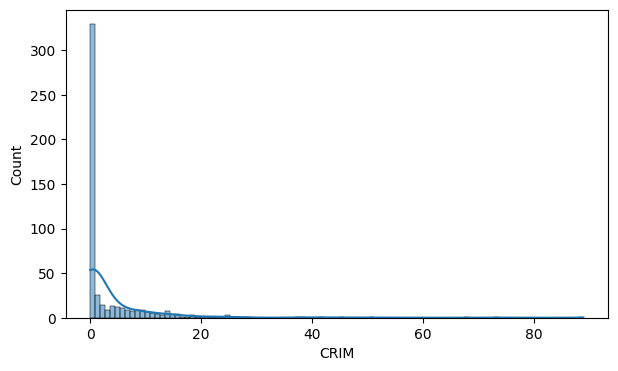

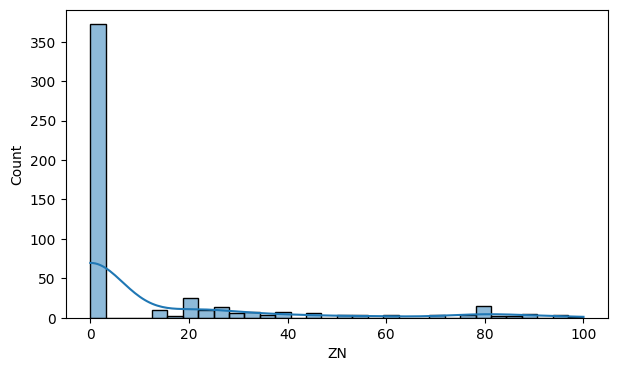

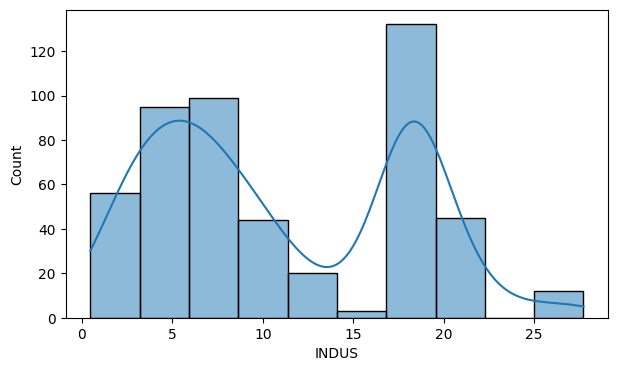

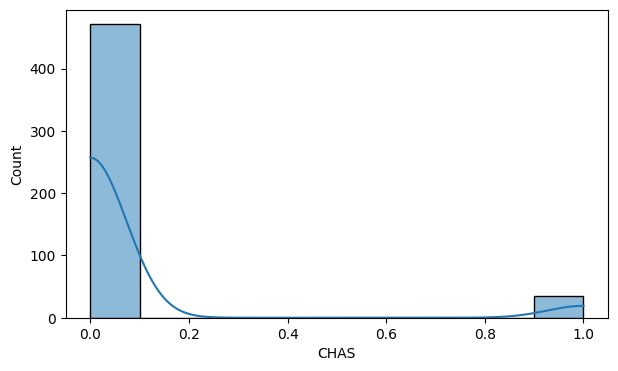

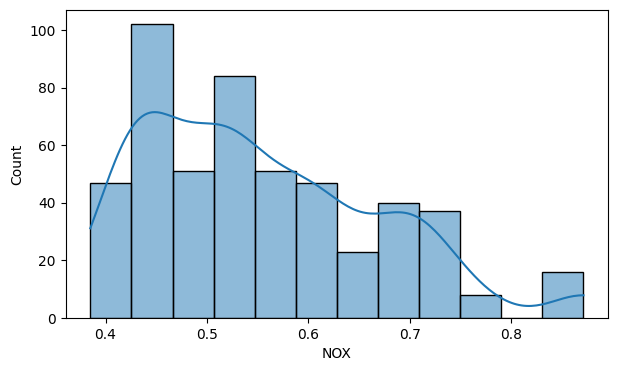

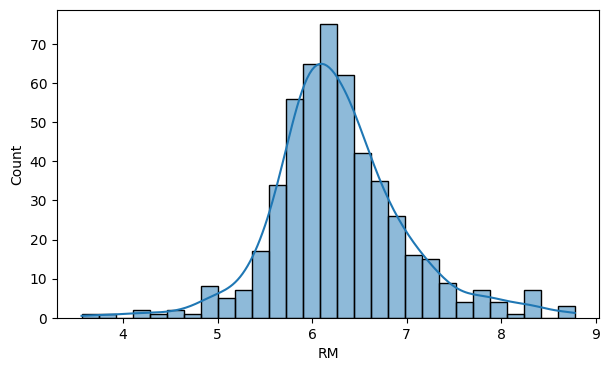

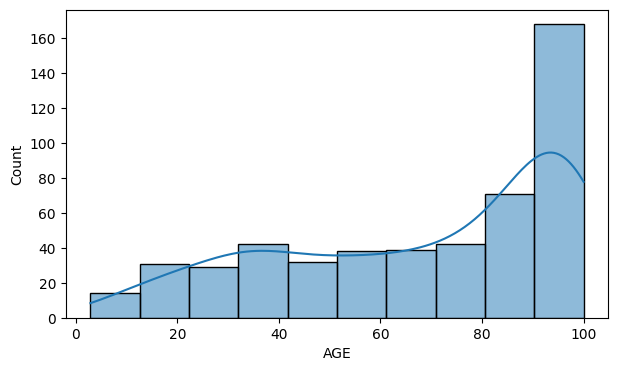

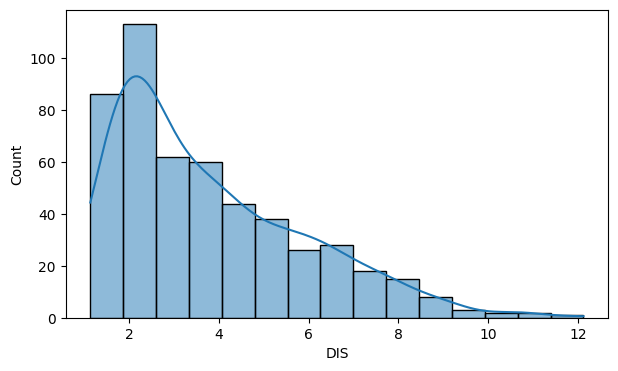

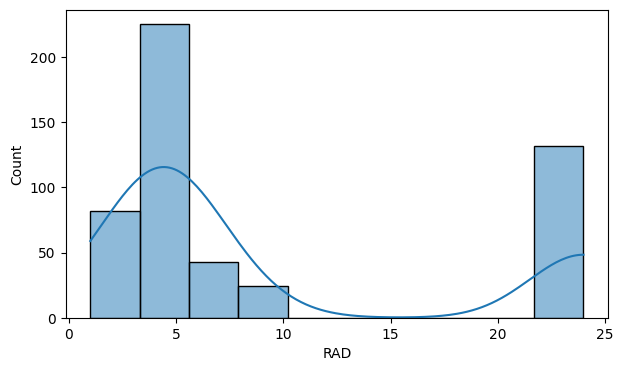

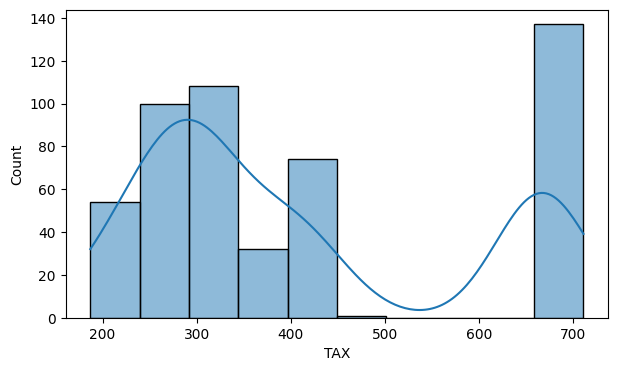

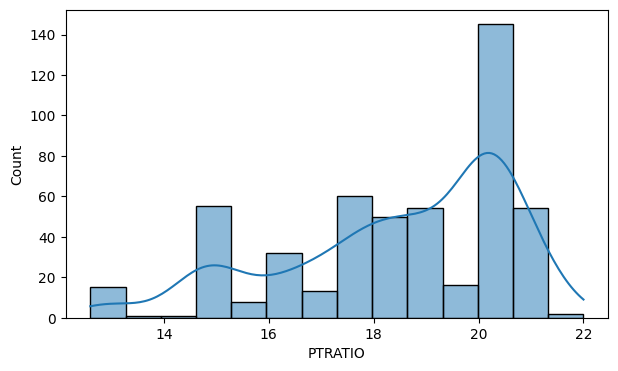

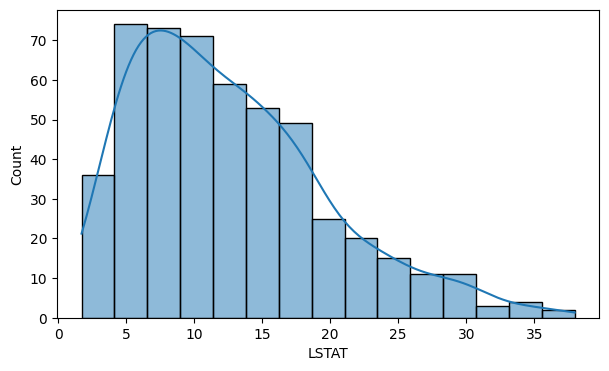

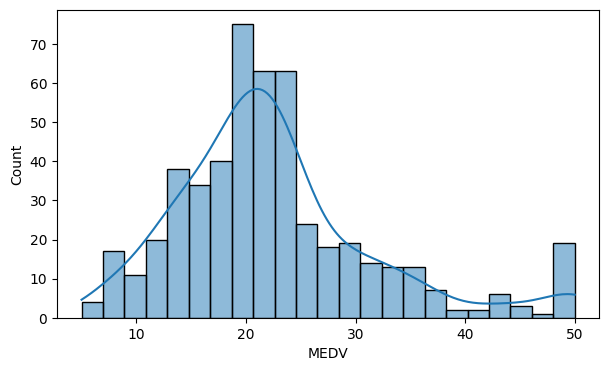

In [159]:
# Plotting all the columns to look at their distributions
for i in df.columns:
    
    plt.figure(figsize = (7, 4))
    sns.histplot(data = df, x = i, kde = True)
    plt.show()

** Observations of charts above **


*   Crime Rate is of the majority shows near Zero and however there are areas with 80% crime rate.
*   INDUS - non-retail business show in 2 zone which suggest small and large non-retail business are there which might mean there is manufacturing and also it might be offices of major corporations.
*   Population for aging is higher which might mean there are many baby boomers and also low birthrates.
*   most houses are valued


In [160]:
df['MEDV_log'] = np.log(df['MEDV'])

<Axes: xlabel='MEDV_log', ylabel='Count'>

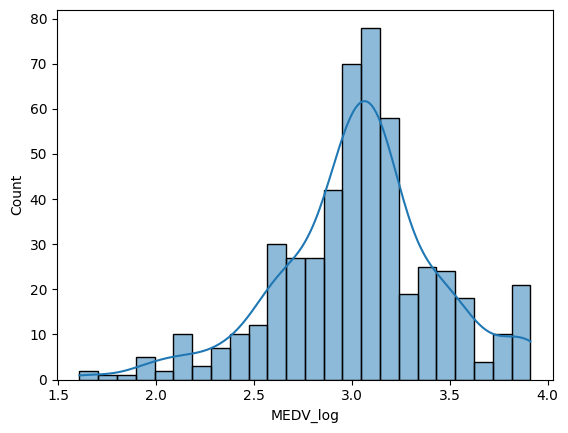

In [161]:
sns.histplot(data = df, x = 'MEDV_log', kde = True)

**Observation**
- The log-transformed variable (**MEDV_log**) appears to have a **nearly normal distribution without skew**, and hence we can proceed.

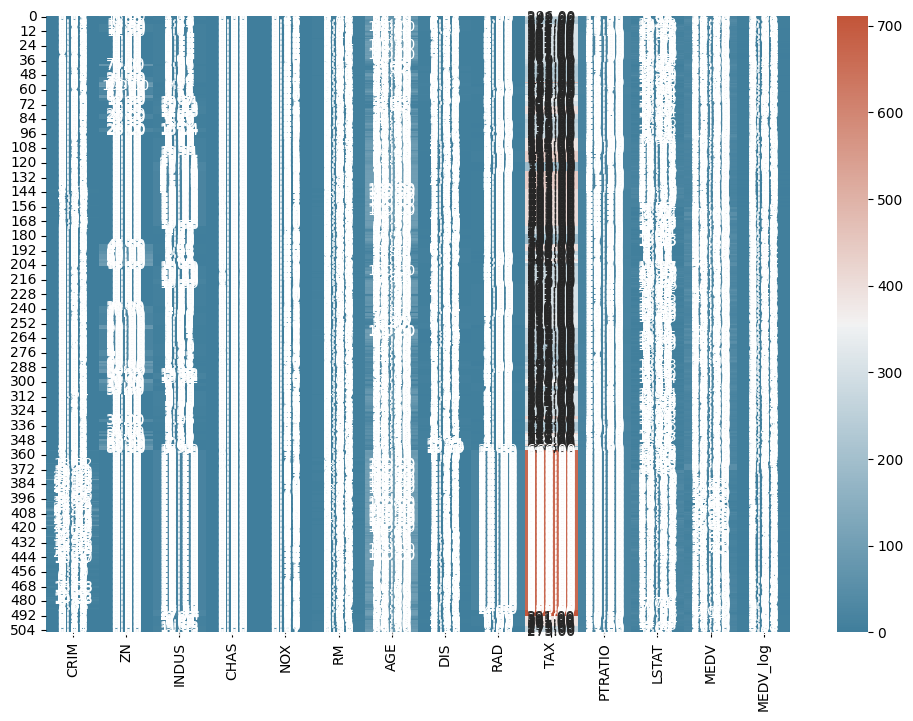

In [162]:
plt.figure(figsize = (12, 8))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(df, annot = True, fmt = '.2f', cmap = cmap)
plt.show()

**Observation**

most columns are below the 300 mark but the taxes that show high values above 500 which might be building in downtown area.

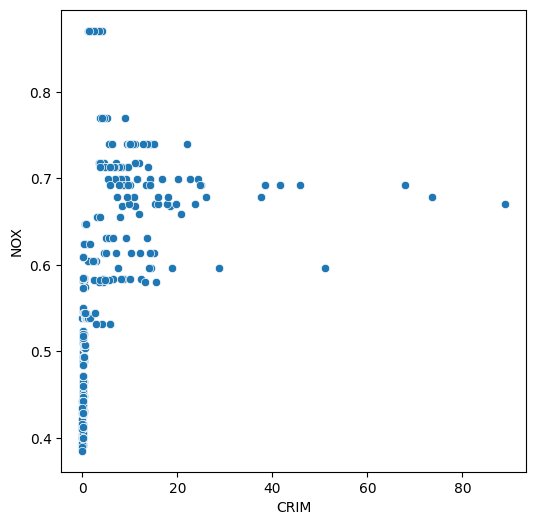

In [163]:
# Scatterplot to visualize the relationship between NOX and CRIM
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'CRIM', y = 'NOX', data = df)

plt.show()

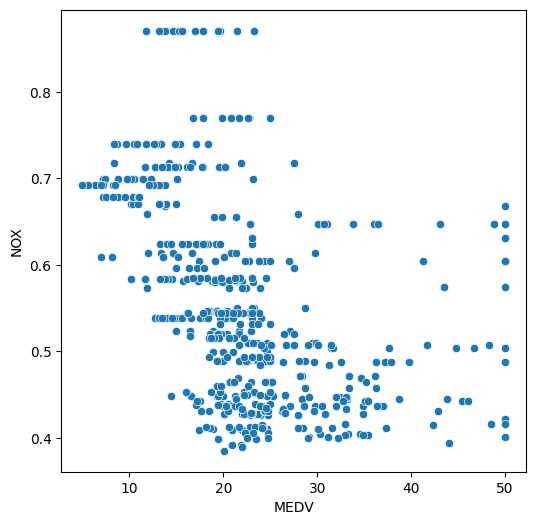

In [164]:
# Scatterplot to visualize the relationship between NOX and CRIM
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'MEDV', y = 'NOX', data = df)

plt.show()

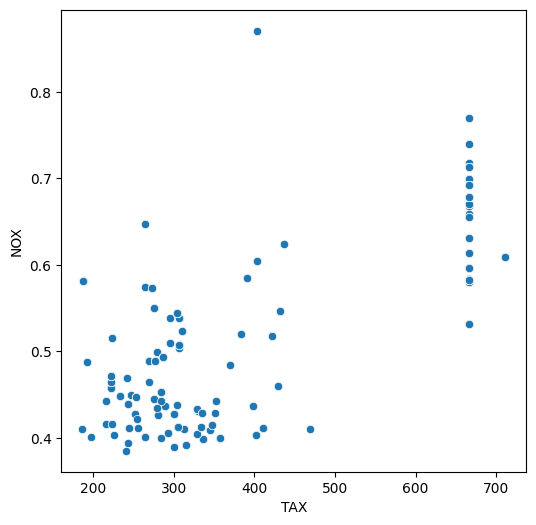

In [165]:
# Scatterplot to visualize the relationship between NOX and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'TAX', y = 'NOX', data = df)

plt.show()

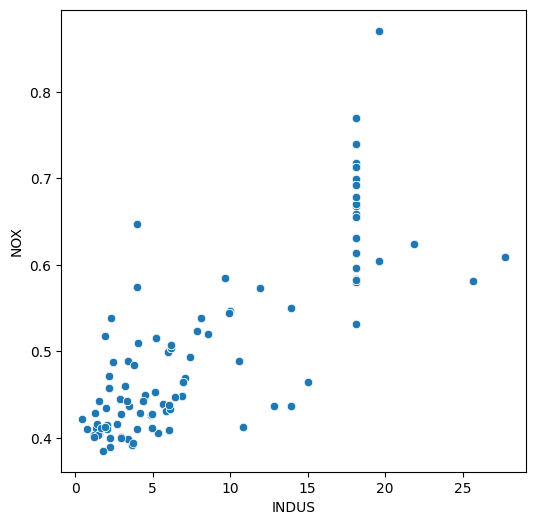

In [166]:
# Scatterplot to visualize the relationship between NOX and INDUS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'NOX', data = df)

plt.show()

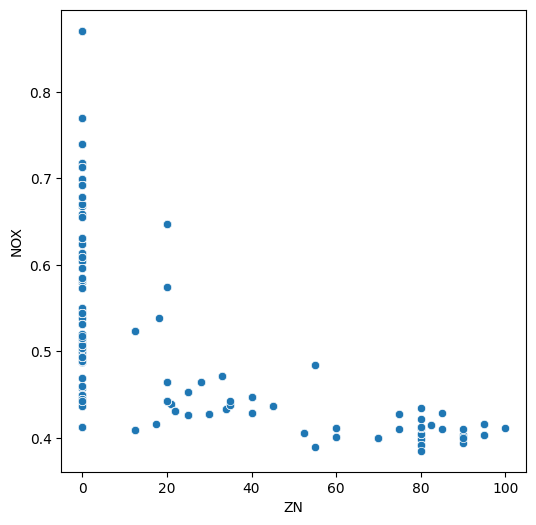

In [167]:
# Scatterplot to visualize the relationship between NOX and ZN
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'ZN', y = 'NOX', data = df)

plt.show()

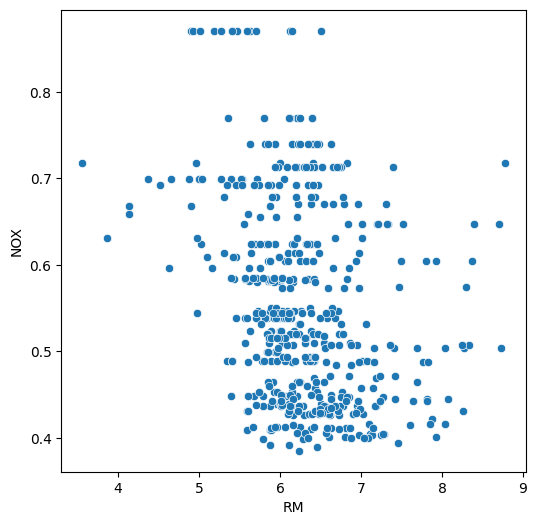

In [168]:
# Scatterplot to visualize the relationship between NOX and RM
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RM', y = 'NOX', data = df)

plt.show()

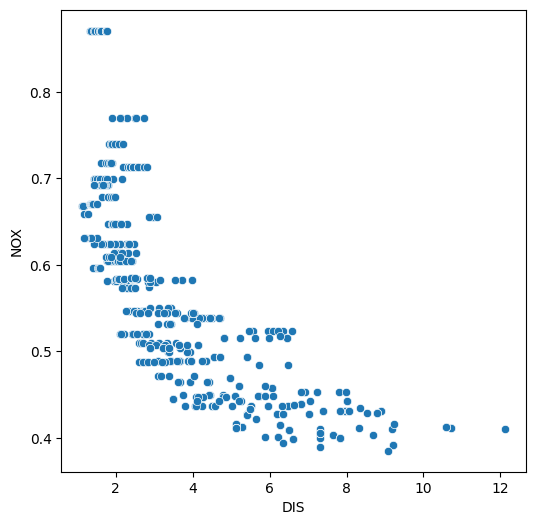

In [169]:
# Scatterplot to visualize the relationship between NOX and DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'DIS', y = 'NOX', data = df)

plt.show()

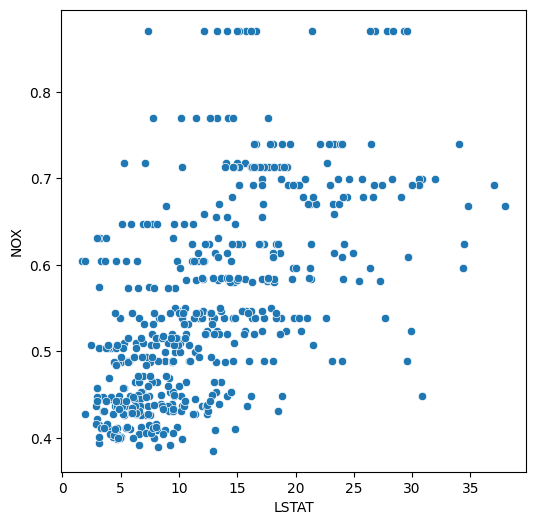

In [170]:
# Scatterplot to visualize the relationship between NOX and LSTAT
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'LSTAT', y = 'NOX', data = df)

plt.show()

**Observation**: 
- Proportion of non-retail business acres per town (INDUS) does have some relationship with Nitric Oxide concentration (NOX) which may be due to manufacturing industries that are not related to retail services. 
- We can see that residentail the larger based on ZN they see less NOX. However smaller residences may be apartments near industrial zones which is typical of metropolitans cities. 
- we also see that the lower status population may be around NOX more the high the density which makes senses is there that there is someone working in areas of high NOX is that is being produced due to manufacturing.
- Closer the Distance to job centers and higher the Nitric oxide val.

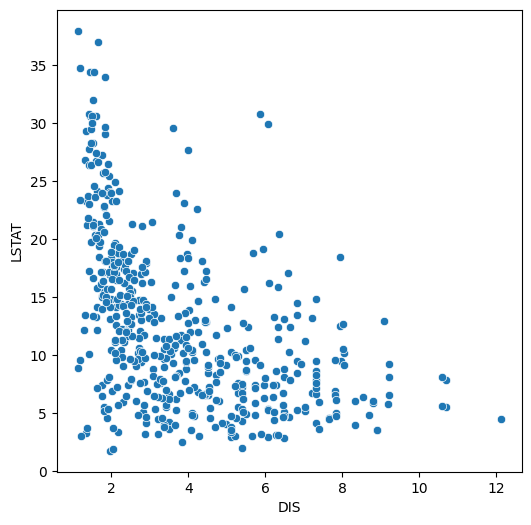

In [171]:
# Scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'DIS', y = 'LSTAT', data = df)

plt.show()

- Closer the distance to employment center the higher the lower stats and also higher the NOX value and lower the zn and indus as well. 

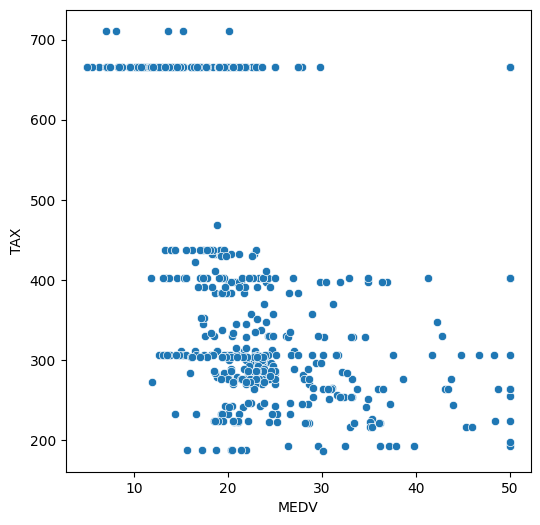

In [172]:
# Scatterplot to visualize the relationship between TAX and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'MEDV', y = 'TAX', data = df)

plt.show()

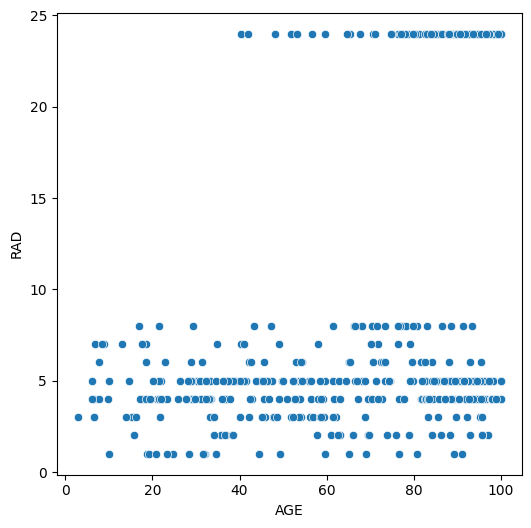

In [173]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'RAD', data = df)

plt.show()

In [174]:
# rad greater than 20
RAD20 = len(df[df['RAD'] > 20])
RADless20 = len(df[df['RAD'] < 10])
print(f"{RAD20} is the greater than 20 and {RADless20} is less 10 house near a highway")

132 is the greater than 20 and 374 is less 10 house near a highway


**Observations**
- this might be show comparison between 2 different residency but no clear indication what that is.



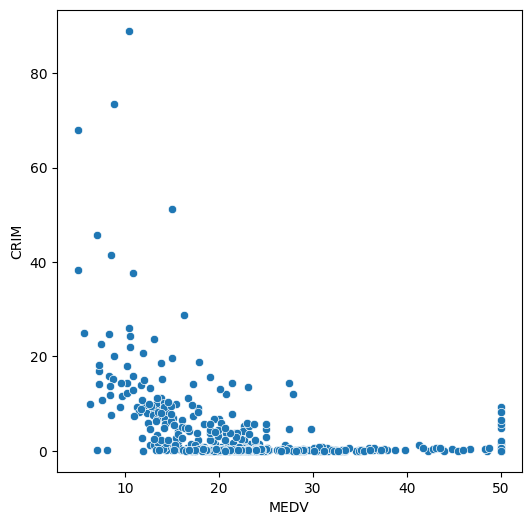

In [175]:
# Scatterplot to visualize the relationship between MEDV and CRIM
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'MEDV', y = 'CRIM', data = df)

plt.show()

- Low crime with high Median value of owner-occupied homes
- However this might also be specific areas that might be outliners

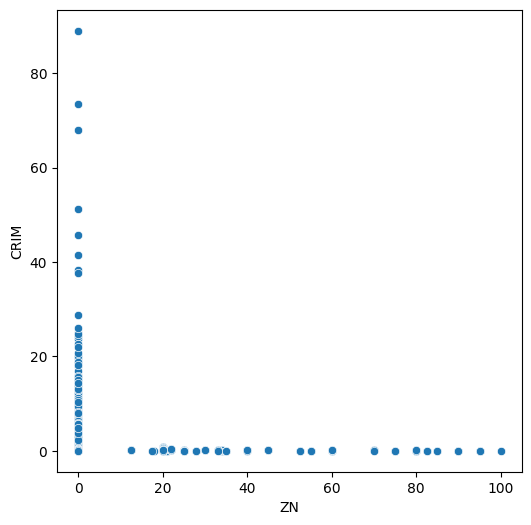

In [176]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'ZN', y = 'CRIM', data = df)

plt.show()

- Lower the residentail zone the higher the crime rate which might be inverse relationship

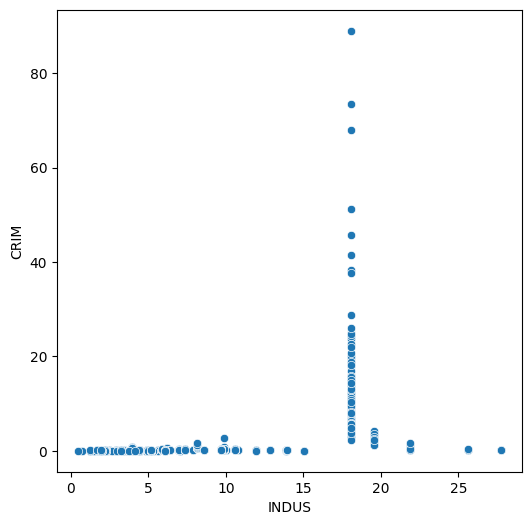

In [177]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'CRIM', data = df)

plt.show()

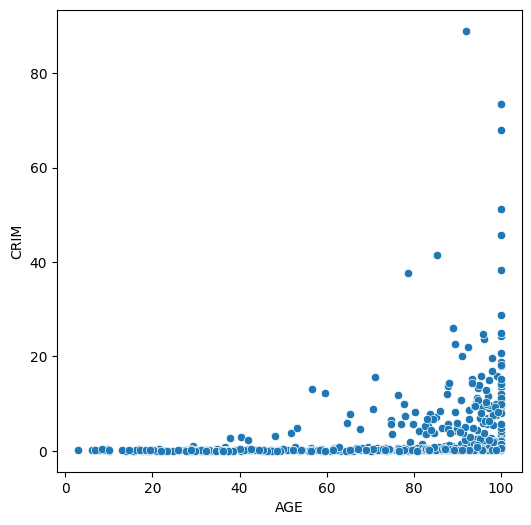

In [178]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'CRIM', data = df)

plt.show()

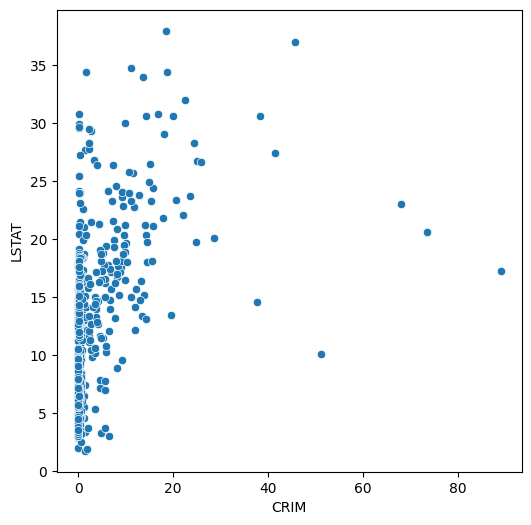

In [179]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'CRIM', y = 'LSTAT', data = df)

plt.show()

- This correlation seems to also be with lower status as well which might be relationship between CRIM, AGE, and LSTAT.

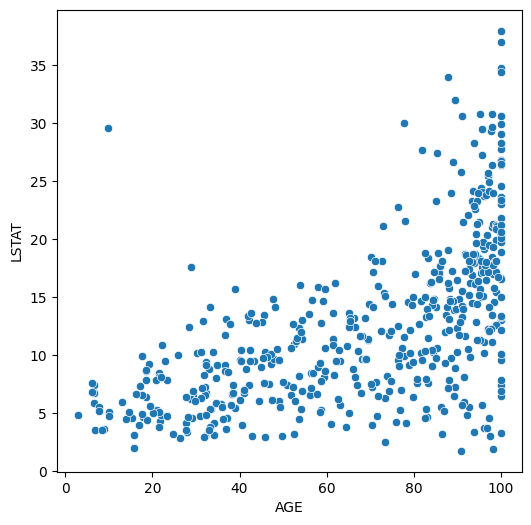

In [180]:
# Scatterplot to visualize the relationship between AGE and LSTAT
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'LSTAT', data = df)

plt.show()


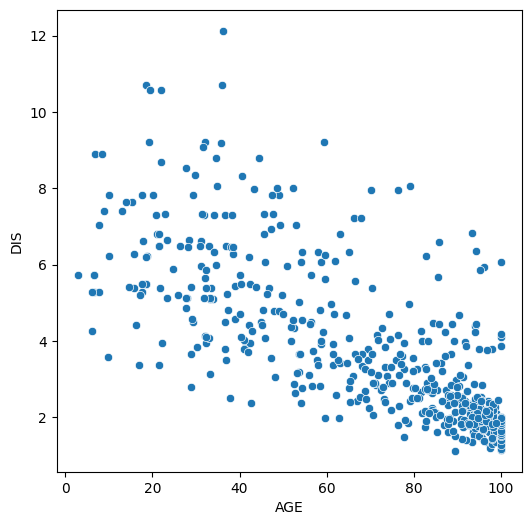

In [181]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'DIS', data = df)

plt.show()

**OBSERVATION:** 
- higher the age closer they are to employment centers it might be due to not able to walk further.
- might also be due to old locations of the employment centers which is the older population which may be the locations from time they started to leave there possible more than 40 to 60 years ago.

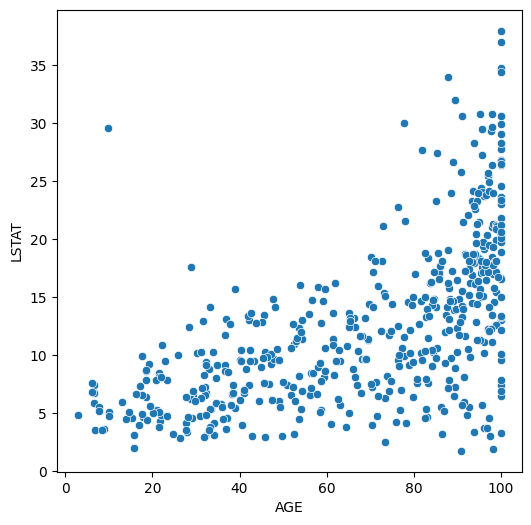

In [182]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'LSTAT', data = df)

plt.show()

**Observation**: correlation seems to be with age and lower status. It reflects why the older population leaves near Job employment centers due to status they need to find work frequetly possibly hour wage jobs so it reflects on why they leave near the centers.

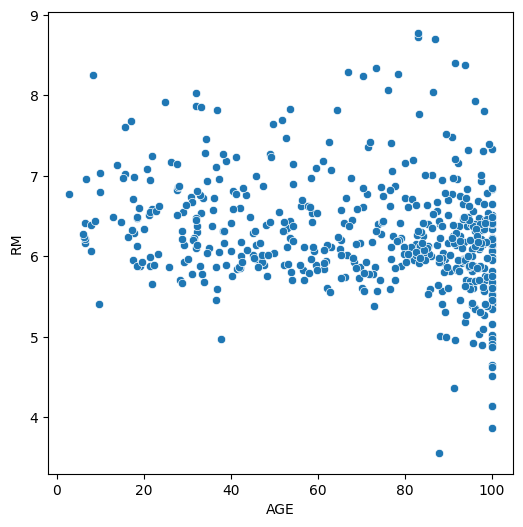

In [183]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'RM', data = df)

plt.show()

larger old population seems to be housing more towards smaller rooms sized properties. which also matches lower status would likely be in smaller properties.



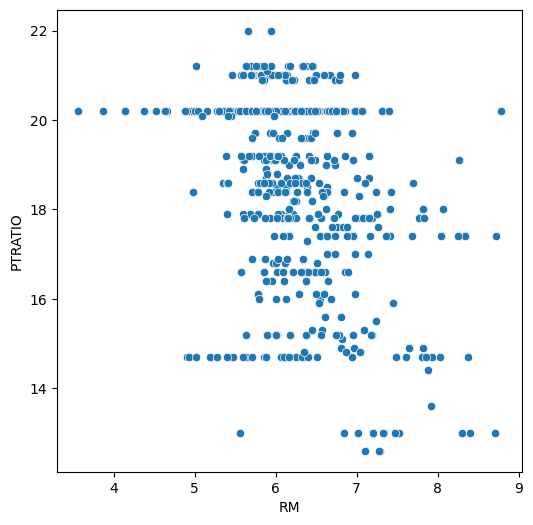

In [184]:
# Scatterplot to visualize the relationship between RM and PTRATIO
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RM', y = 'PTRATIO', data = df)

plt.show()

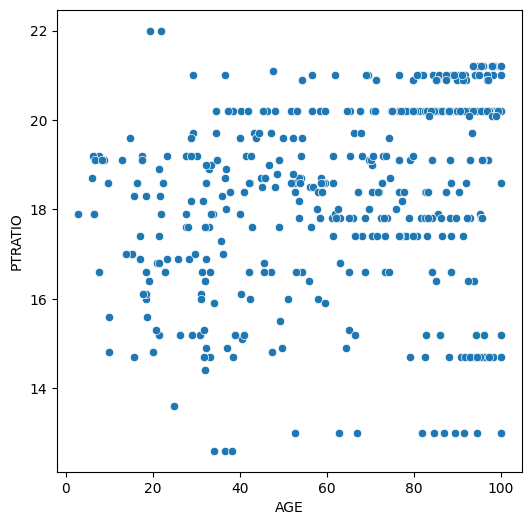

In [185]:
# Scatterplot to visualize the relationship between AGE and PTRATIO
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'PTRATIO', data = df)

plt.show()

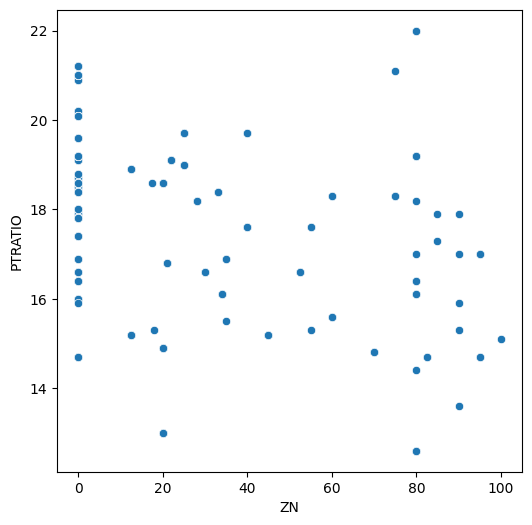

In [186]:
# Scatterplot to visualize the relationship between ZN and PTRATIO
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'ZN', y = 'PTRATIO', data = df)

plt.show()

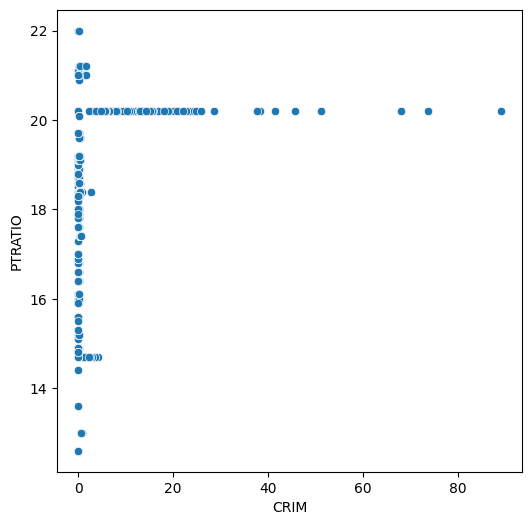

In [187]:
# Scatterplot to visualize the relationship between ZN and PTRATIO
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'CRIM', y = 'PTRATIO', data = df)

plt.show()

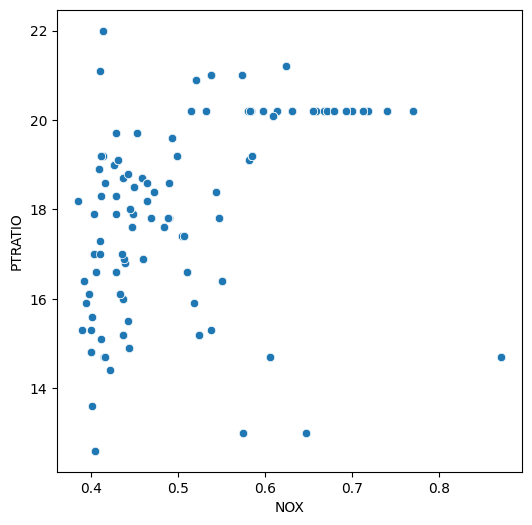

In [188]:
# Scatterplot to visualize the relationship between ZN and PTRATIO
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'NOX', y = 'PTRATIO', data = df)

plt.show()

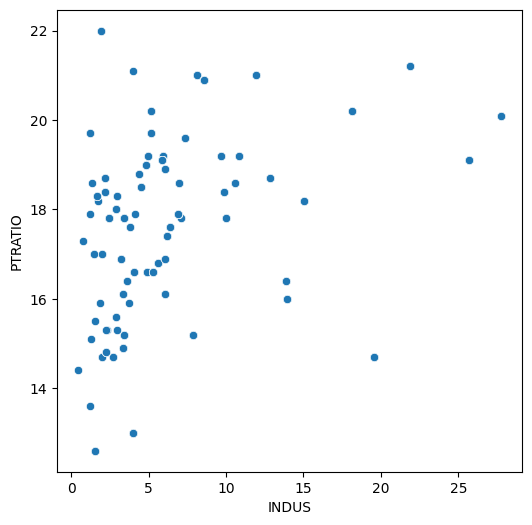

In [189]:
# Scatterplot to visualize the relationship between ZN and PTRATIO
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'PTRATIO', data = df)

plt.show()

**Observations**:

- NOX and INDUS lowever values correlate to high Pupil-teacher ratio which makes sense as most students with be in areas of residents
- CRIM and RM seems to be around 20 PTRATIO might have a relationship but not sure what that could.
- The distribution on AGE v PTRATIO scatter chart is everywhere which does not show much of correlation for anything by age.


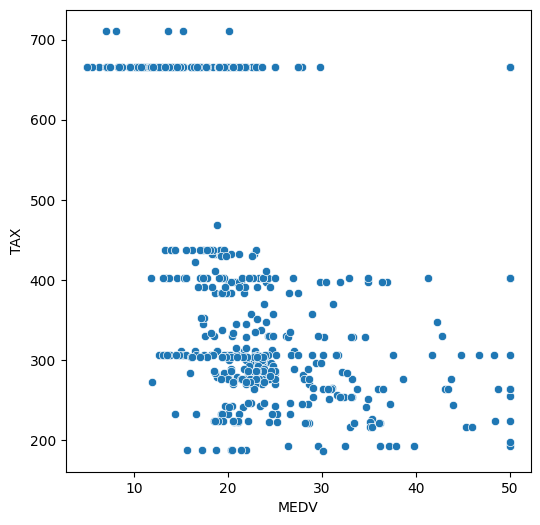

In [190]:
# Scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'MEDV', y = 'TAX', data = df)

plt.show()

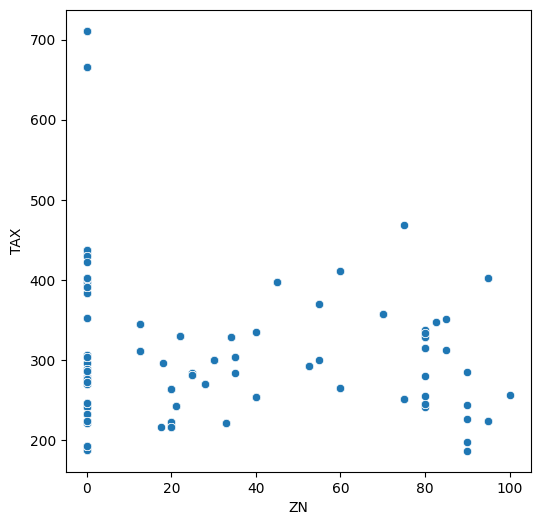

In [191]:
# Scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'ZN', y = 'TAX', data = df)

plt.show()

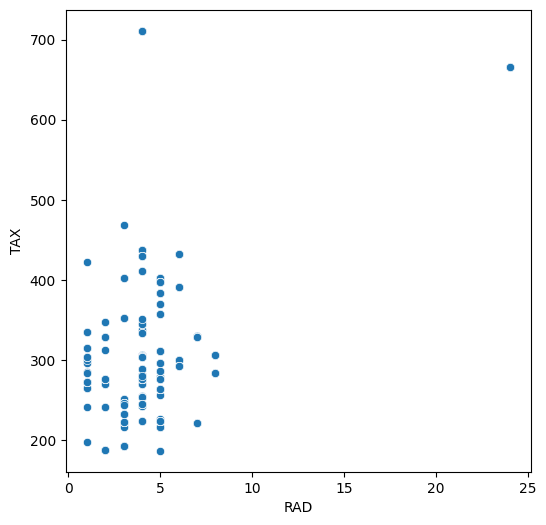

In [192]:
# Scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RAD', y = 'TAX', data = df)

plt.show()

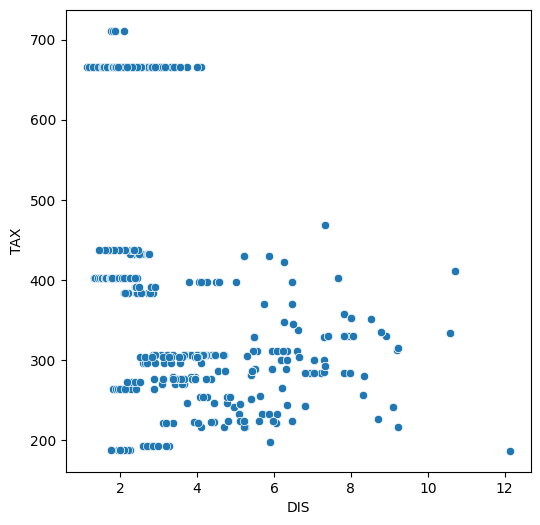

In [193]:
# Scatterplot to visulaize the relationship between DIS and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'DIS', y = 'TAX', data = df)

plt.show()

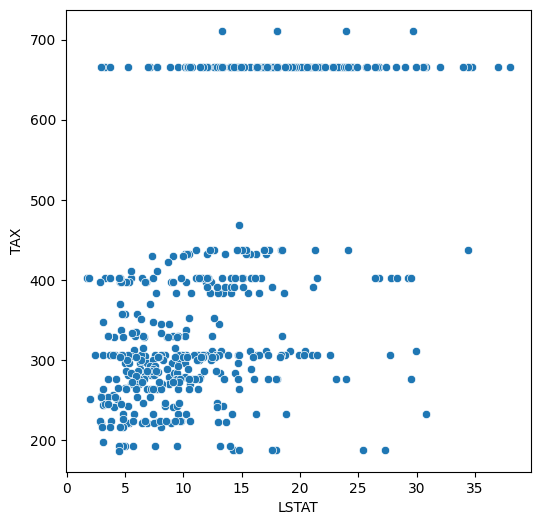

In [194]:
# Scatterplot to visulaize the relationship between lSTAT and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'LSTAT', y = 'TAX', data = df)

plt.show()

- There might be outliers based on the RAD v TAX and ZN v Tax that might need to be removed.
- MEDV v TAX scatter chart seems to suggest highest TAX to be 711 and highest MEDV to be 50.

## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [195]:
# removing outliers corresponding the high tax rate to check correlation between TAX and RAD

df1 = df[df['TAX'] < 600]

# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429196


**Observation**:

So, the high correlation between TAX and RAD is due to the outliers. The tax rate for some properties might be higher due to some other reason.

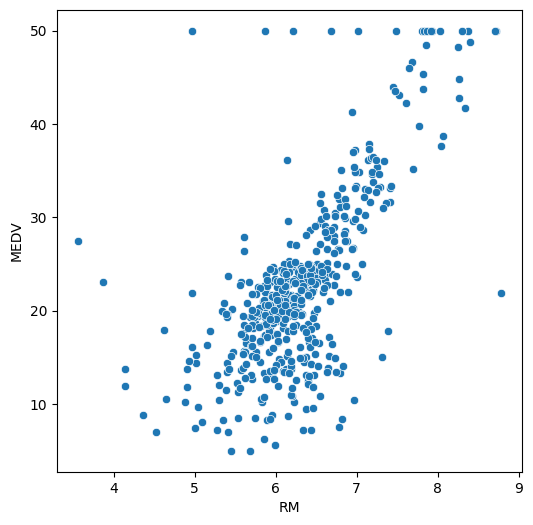

In [196]:
# Scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RM', y = 'MEDV', data = df)

plt.show()

- higher rooms give higher value however the there are houses MEDV val at 50 possibly  due to outliers as noted before.

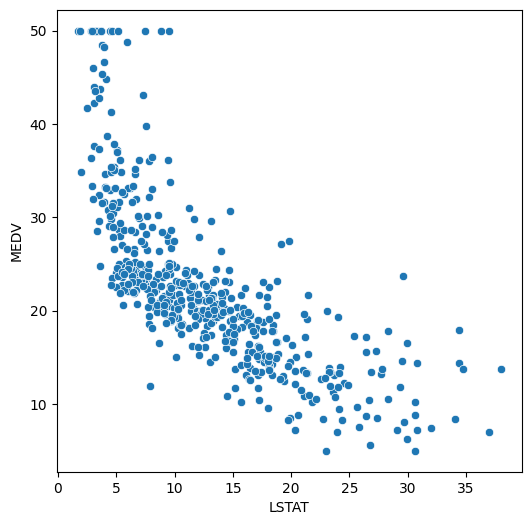

In [197]:
# Scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df)

plt.show()

**Observations**:
- the less the % lower status of the population, the higher the Median value of owner-occupied homes.
- once again we see MEDV capped at 50 which might mean outliers again.

## Model Building - Linear Regression

There are too many variables that are related to each other for linear regression to be effective presently so might need to split the dataset but also check the Multicollinearity

In [198]:
# Separate the dependent variable and indepedent variables
Y = df['MEDV_log']

X = df.drop(columns = {'MEDV', 'MEDV_log'})

# Add the intercept term
X = sm.add_constant(X)

In [199]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [200]:
# Checking for Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


RAD and TAX have Variance Inflation Factor higher than 5 which means we need to remove that higher valued from the model. In this case it is tax

In [201]:
# Create the model after dropping TAX
X_train = X_train.drop("TAX", axis=1)  ## Complete the code

# Check for VIF
print(checking_vif(X_train))

    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


VIF how is under 5 for all values once tax is gone which we can conclude the Multicollinearity has been removed.

we can now create the model with Ordinary least squares (OLS)

## Model Performance Check

1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model is performing after cross validation?

In [202]:
# Create the model with OLS model
model_OLS = sm.OLS(y_train, X_train)
model_OLS_result = model_OLS.fit()

# Get the model summary
print(model_OLS_result.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Mon, 05 Jun 2023   Prob (F-statistic):          1.40e-101
Time:                        04:46:55   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.0

he p-values for ZN, AGE, and INDUS are 0.155, 0.645, and 0.883, respectively. Since all of these p-values are greater than 0.05, we cannot reject the null hypothesis for any of these independent variables. Since this is the case then we can drop them as well to retrain the model.

In [203]:
# Create the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df DataFrame
Y = df['MEDV_log']

X = df.drop(['MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS'], axis=1)

X = sm.add_constant(X)

# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 1)

# Create the model
model_OLS_2 = sm.OLS(y_train, X_train).fit()

# Get the model summary
print(model_OLS_2.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Mon, 05 Jun 2023   Prob (F-statistic):          2.61e-104
Time:                        04:46:55   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.0

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

In [204]:
# checking residual
residual = model_OLS_2.resid
residual.mean()

-2.5303049047106675e-15

The mean of residuals is very close to 0. Hence, the corresponding assumption is satisfied.

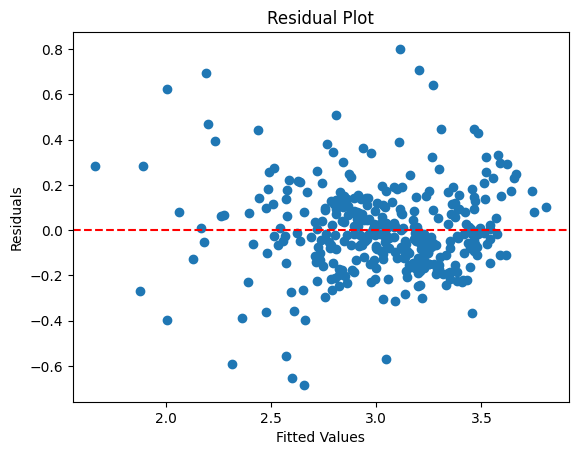

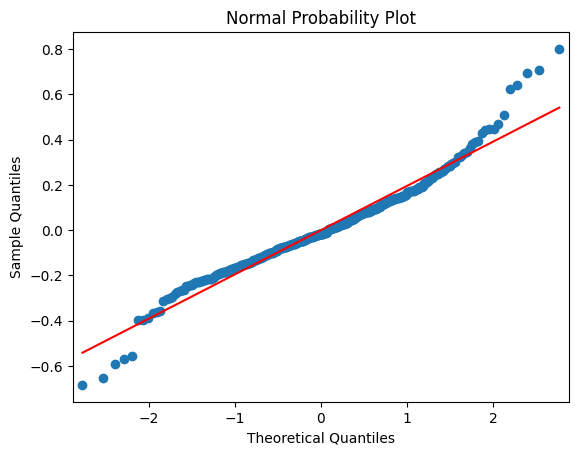

In [205]:
# assuming 'results' is the fitted OLS model
residuals = model_OLS_2.resid
fitted_values = model_OLS_2.fittedvalues

# create a residual plot
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# create a normal probability plot
sm.qqplot(residuals, line='s')
plt.title('Normal Probability Plot')
plt.show()

<Axes: ylabel='Count'>

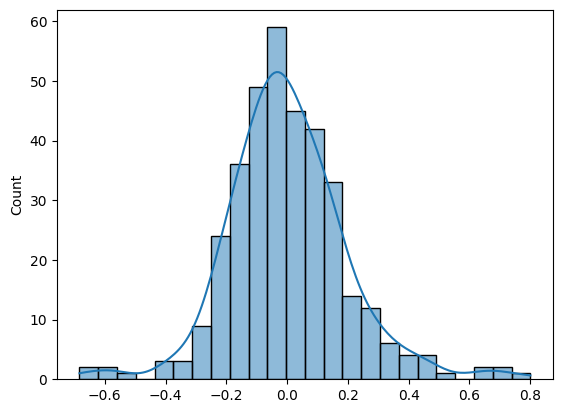

In [206]:
sns.histplot(residual, kde = True)

We can see that the error terms are normally distributed. The assumption of normality is satisfied

In [207]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [208]:
# acheckling 
test = sms.het_goldfeldquandt(model_OLS_2.resid, model_OLS_2.model.exog)


name = ["F statistic", "p-value"]
test_res = { i[0]:i[1] for i in lzip(name, test)}


if test_res['p-value'] < 0.05:
    print('The p-value is', test_res['p-value'], 'which indicates that there is evidence to suggest that the assumption of homoscedasticity is violated.')
else:
    print('The p-value is', test_res['p-value'], 'which indicates that there is no evidence to suggest that the assumption of homoscedasticity is violated.')

print(test_res)

The p-value is 0.30190120067668275 which indicates that there is no evidence to suggest that the assumption of homoscedasticity is violated.
{'F statistic': 1.0835082923425288, 'p-value': 0.30190120067668275}


## Final Model

In [209]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model_OLS_2, X_train, X_test)  

    Data      RMSE       MAE      MAPE
0  Train  0.195504  0.143686  4.981813
1   Test  0.198045  0.151284  5.257965


**Obeservations**:
- For the model’s predictions both the training and test datasets show very small difference which means the model is very accurate. 
- RMSE and MAE is less than 0.01 and MAPE is less than 0.27 difference.



In [210]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


- RSquared and Mean squared Error is a very low error margin which mean the model is very accurate.

In [211]:
coef = model_OLS_2.params

pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})

,Feature,Coefs
0,const,4.649386
1,CRIM,-0.012500
2,CHAS,0.119773
3,NOX,-1.056225
4,RM,0.058907
5,DIS,-0.044069
6,RAD,0.007848
7,PTRATIO,-0.048504
8,LSTAT,-0.029277


In this case, the estimated coefficients for  CRIM, NOX, DIS, PTRATIO, and LSTAT are negative, indicating that as these variables increase, the predicted value of the house price decreases. The estimated coefficients for  CHAS, RM, and RAD are positive, indicating that as these variables increase, the predicted value of the house price also increases.

## Actionable Insights and Recommendations 

- CHAS, RM, and RAD directly influence the price of house going up.
- Also CRIM, NOX, DIS, PTRATIO, and LSTAT does influence the model for the price going down I would also note that the PTRATIO does not clarify what type students and teacher these are univesity or public or private schools. It is possible that private schools might positively impact the house price.

- There is no clear indication of if the property what type of property it was as house value can go up with greenery and residence. Also bungalow vs apartment carry value differently.
- There was no indication if there was a hospitals, schools, shopping centers, fire departments, libraries, grocery stores and parks closest to the residence which also would have positive impact on the house price but since that was indicated the model is still not accurate to predict the price of the house.
- Also there is a possibility the outlier were influenced byt this ommitted information.

___

In [212]:
 !pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [215]:
!jupyter nbconvert '/content/drive/MyDrive/GreatLearnings/ML Project/Learners_Notebook_Boston_house_price_Full+Code.ipynb' --to=html

[NbConvertApp] Converting notebook /content/drive/MyDrive/GreatLearnings/ML Project/Learners_Notebook_Boston_house_price_Full+Code.ipynb to html
[NbConvertApp] Writing 2960976 bytes to /content/drive/MyDrive/GreatLearnings/ML Project/Learners_Notebook_Boston_house_price_Full+Code.html
